# TP1: Agrupamiento de imágenes

**Data Mining en Ciencia y Tecnología**

## 1. Introducción
El procesamiento de imágenes resulta desafiante por su alta dimensionalidad. La estructura de una imagen digital consiste en una matriz de NxM, en donde la subunidad constituyente de la matriz es un pixel que codifica información para un color particular. Cada pixel representa la intesidad de luz en ese punto, que generalmente varía entre [0,255], lo que es equivalente a 8 bits. Para representar imágenes a colores, se utiliza un modelo de percepción humana, en donde el color resulta a través de un sistema aditivo. El modelo se basa en la teoría de los componentes primarios del color que son Rojo, Verde y Azul (RGB Red, Green and Blue, por sus siglas en inglés). Por consiguiente, para representar digitalmente una imagen color, se necesitan 3 matrices de NxM . Una para el Rojo, otra para el Verde y otra para el Azul.

## 2. Objetivos
Familiarizarse con el procesamiento de imágenes. Para ello, se proponen diferentes manipulaciones que permitirán preparar el dataset para la detección y exploración de agrupa- mientos naturales.

## 3. Estructura de los datos:
A partir del siguiente link, se obtendrán las imágenes a color de 210 flores pertenecientes a 10 especies diferentes. Cada imagen consiste en un archivo .PNG de 128 pixeles de ancho por 128 pixeles de profundidad (128x128x3). Adicionlamente, se encuentra el archivo .CSV con las etiquetas (labels) que corresponden a la especie de cada imagen.

## 4. Preprocesamiento de los datos
- Cargar el dataset y sus respectivas etiquetas. Es importante asegurarse que las imágenes sean comparables en color, valor, rango y tamaño.
- Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie.

In [1]:
import os
import cv2
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from PIL import Image, ImageEnhance, ImageOps, ImageFilter

import warnings
warnings.filterwarnings('ignore')

## Constantes

In [2]:
rgb_weights = [0.2989, 0.5870, 0.1140]

In [3]:
# ! kaggle datasets download -d olgabelitskaya/flower-color-images -p ../../data/raw
# ! unzip ../../data/raw/flower-color-images.zip -d ../../data/raw

In [4]:
string_labels = {
    0 : "phlox",
    1 : "rose",
    2 : "calendula",
    3 : "iris",
    4 : "leucanthemum maximum\n(Shasta daisy)",
    5 : "campanula\n(bellflower)",
    6 : "viola",
    7 : "rudbeckia laciniata\n(Goldquelle)",
    8 : "peony",
    9 : "aquilegia",
}
path_to_flowers = Path("../../data/raw/flower_images/flower_images")
labels_path = os.path.join(path_to_flowers, "flower_labels.csv")

In [5]:
flowers = pd.read_csv(labels_path)
flowers["label"] = flowers["label"].map(string_labels)
flowers["image_layers"] = flowers.apply(lambda x: np.asarray(Image.open(os.path.join(path_to_flowers, x["file"])).convert("RGB")), axis=1)
flowers.loc[:, "image_layers"] = flowers.loc[:, "image_layers"].apply(lambda x: x[0:128, 0:128,:])
flowers["image_layers"] = flowers["image_layers"].apply(lambda x: np.nan_to_num(x))

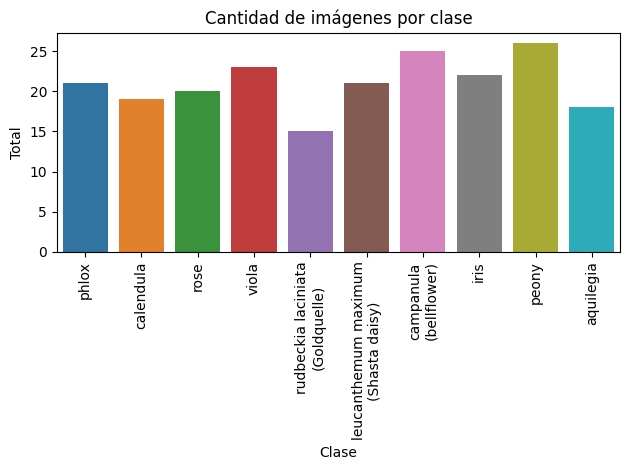

In [6]:
sns.countplot(x="label", data=flowers)
plt.title("Cantidad de imágenes por clase")
plt.xlabel("Clase")
plt.ylabel("Total")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

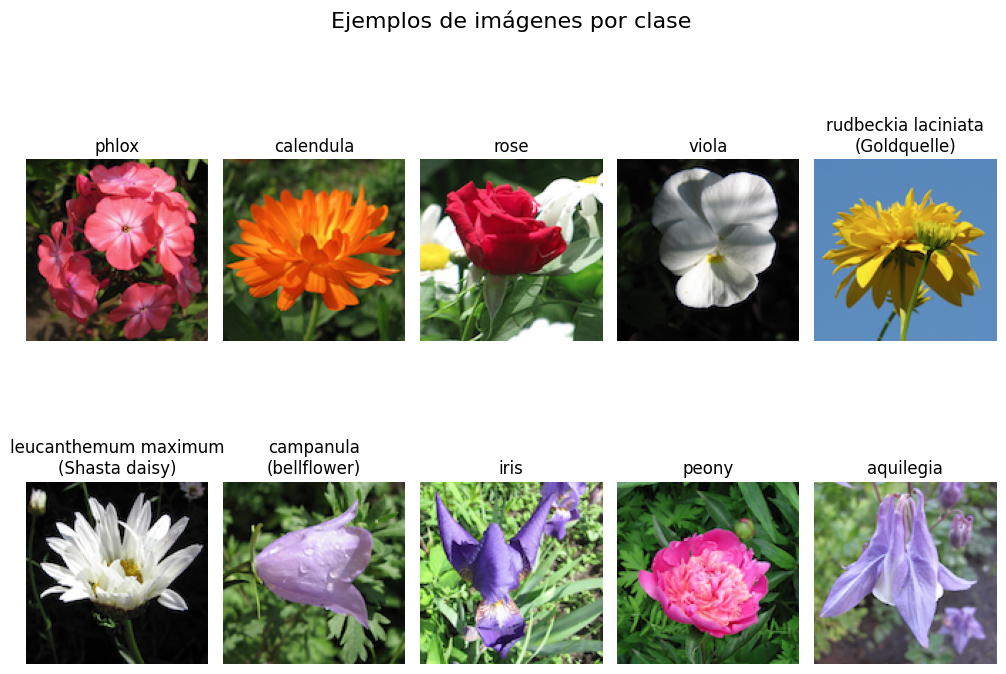

In [7]:
nrows=2
ncols=len(flowers["label"].unique())//nrows
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, sharex=True, sharey=True, figsize=(10,8))
axes = axes.flat

for i,label in enumerate(list(flowers["label"].unique())):
    image = flowers["image_layers"][flowers["label"]==label].iloc[0]
    axes[i].set_title(label)
    axes[i].imshow(image)
    axes[i].axis('off')
fig.suptitle("Ejemplos de imágenes por clase", fontsize=16)
plt.tight_layout()
plt.show()

## 5. Manipulación de datos
- Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.

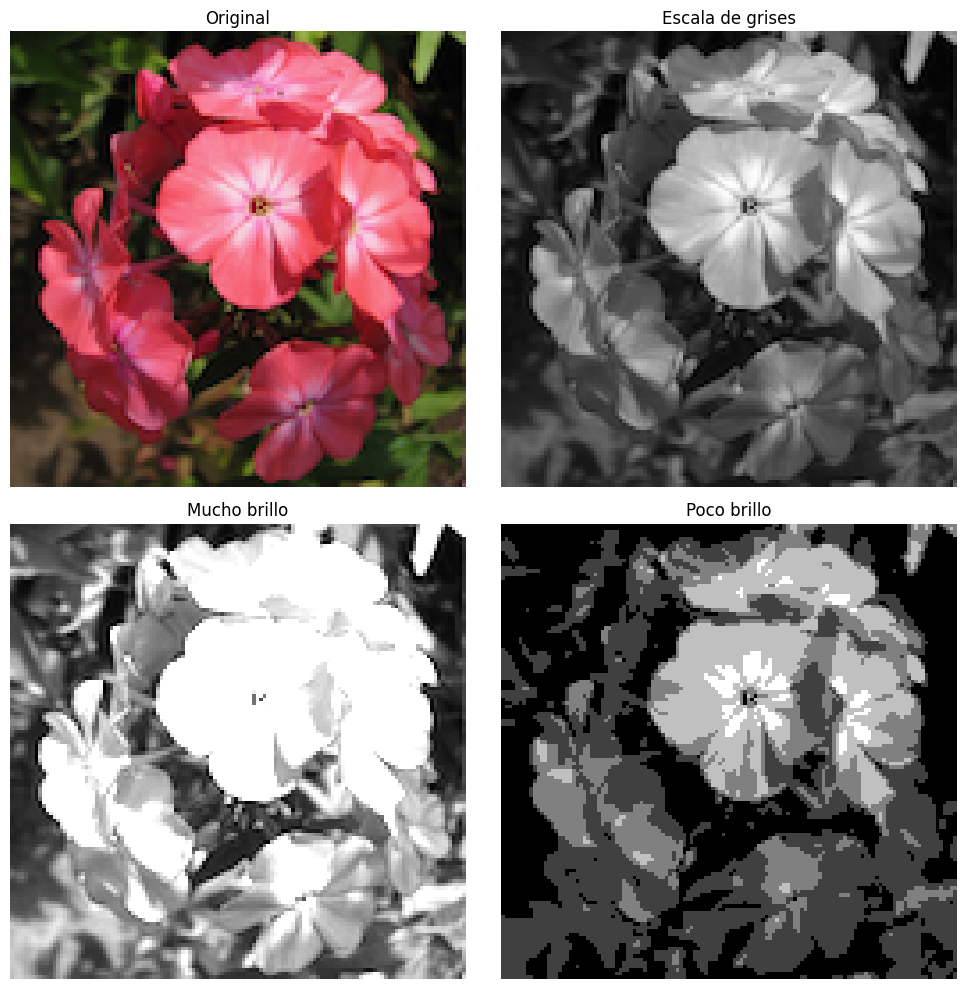

In [8]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 10))
axes = axes.flat

image = flowers.loc[0,"image_layers"]
image = Image.fromarray(image)

image_gray = ImageOps.grayscale(image)
bright_enhancer = ImageEnhance.Brightness(image_gray)

image_bright = bright_enhancer.enhance(2.5)
image_dark = bright_enhancer.enhance(0.02)

axes[0].imshow(image)
axes[1].imshow(image_gray, cmap='gray')
axes[2].imshow(image_bright, cmap="gray")
axes[3].imshow(image_dark, cmap='gray')

axes[0].set_title("Original")
axes[1].set_title("Escala de grises")
axes[2].set_title("Mucho brillo")
axes[3].set_title("Poco brillo")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

plt.tight_layout()
plt.show()

- Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? Si existen otras transformaciones mostrar más de una conversión.

No es la única manera. Se puede usar `Pillow`, `cv2` o `numpy` para manipular la imagen.

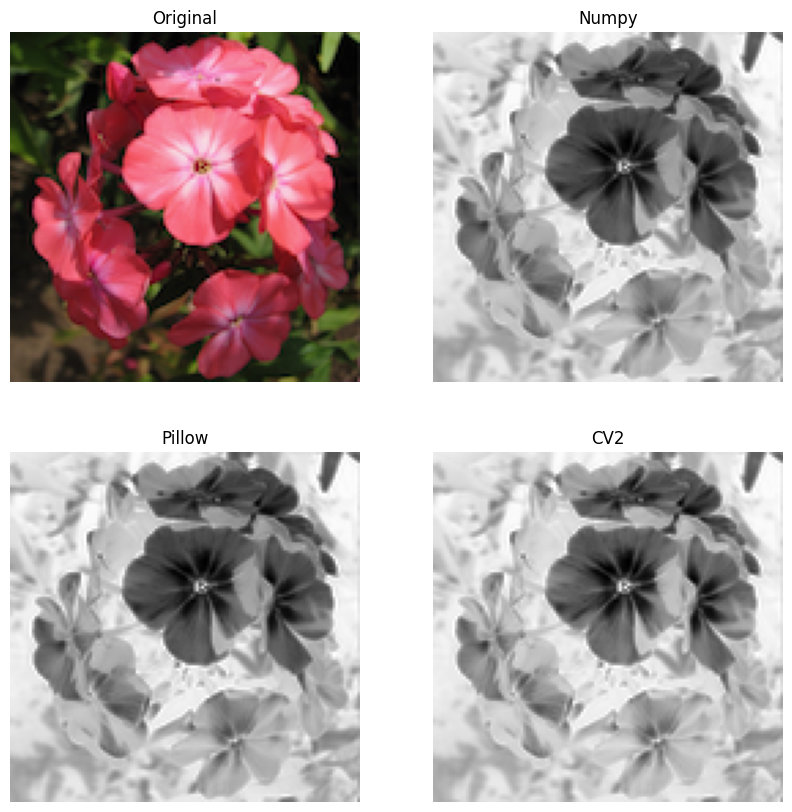

In [9]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(10, 10))
axes = axes.flat

image = flowers.loc[0, "image_layers"]
path_to_image = os.path.join(path_to_flowers, flowers.loc[0, "file"])

image_numpy = np.dot(image[..., :3], rgb_weights)
image = Image.fromarray(image)

image_PIL =  image.convert('L')

image_cv2 = cv2.imread(path_to_image)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2GRAY)

axes[0].imshow(image)
axes[1].imshow(image_numpy, cmap='binary')
axes[2].imshow(image_PIL, cmap='binary')
axes[3].imshow(image_cv2, cmap="binary")

axes[0].set_title("Original")
axes[1].set_title("Numpy")
axes[2].set_title("Pillow")
axes[3].set_title("CV2")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

plt.show()

- Recortar una parte significativa de la imagen, quedándose sólo con el círculo central de la misma.


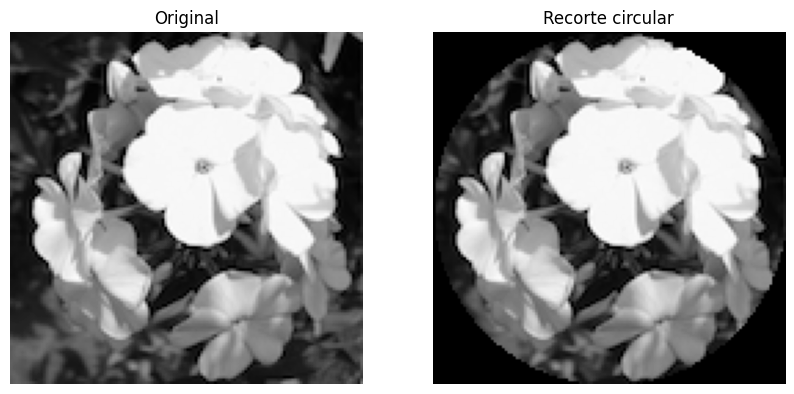

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 10))
axes = axes.flat

image_original = flowers.loc[0, "image_layers"]
image_original = image_original[:,:,0]
width = image_original.shape[0]
height = image_original.shape[1]

c_x = width//2
c_y = height//2
R = 64

mask_zeros = np.zeros(shape=(width,height), dtype=float)
mask_zeros_ones = mask_zeros

for i in range(width):
    for j in range(height):
        if (i-c_x)**2 + (j-c_y)**2 < R**2:
            mask_zeros_ones[i,j] = 1

final_image = np.multiply(image_original, mask_zeros_ones)

axes[0].imshow(image_original, cmap="gray", vmin=0, vmax=255)
axes[1].imshow(final_image, cmap="gray", vmin=0, vmax=255)

axes[0].set_title("Original")
axes[1].set_title("Recorte circular")

axes[0].axis('off')
axes[1].axis('off')
plt.show()

- Generar dos imágenes random: una imagen mezclando los pixels y otra mezclando partes de diferentes imágenes.

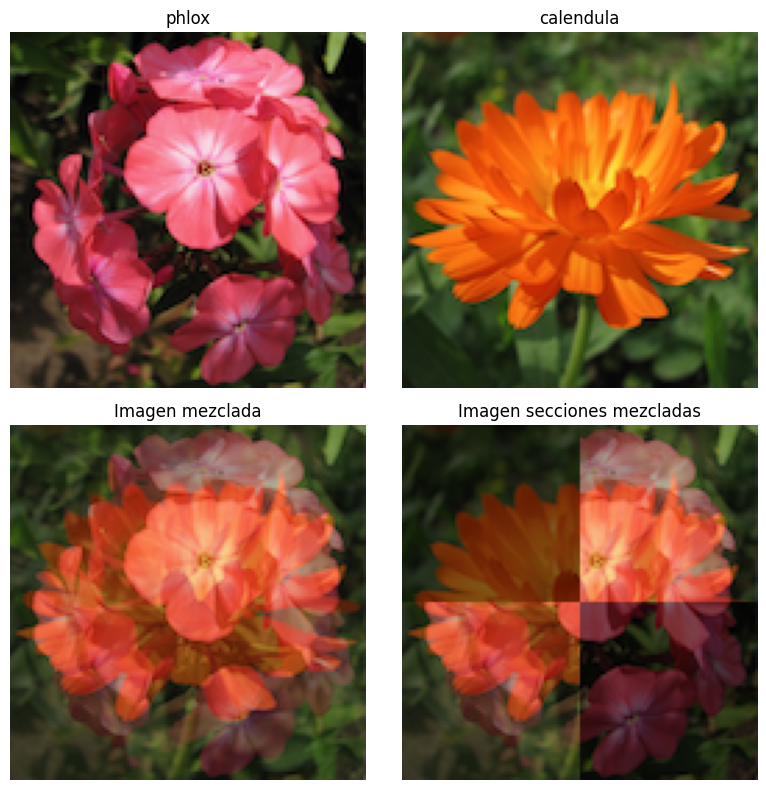

In [35]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8, 8))
axes = axes.flat

img_1 = flowers.loc[0, "image_layers"] / 255
img_2 = flowers.loc[2, "image_layers"] / 255

img_1_section = img_1.copy()
img_2_section = img_2.copy()

img_1_section[0:64, 0:64, :] = 0
img_2_section[64:128, 64:128, :] = 0

image_mix_wise = np.add(img_1, img_2) / 2
image_mix_sections = np.add(img_1_section, img_2_section) / 2


img_1_label = flowers.loc[0, "label"]
img_2_label = flowers.loc[2, "label"]

axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(image_mix_wise, vmin=0, vmax=1)
axes[3].imshow(image_mix_sections, vmin=0, vmax=1)

axes[0].set_title(img_1_label)
axes[1].set_title(img_2_label)
axes[2].set_title("Imagen mezclada")
axes[3].set_title("Imagen secciones mezcladas")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

plt.tight_layout()
plt.show()

- Aplicar dos tipos diferentes de filtros sobre una imagen, explique en qué casos conviene usar cada uno.

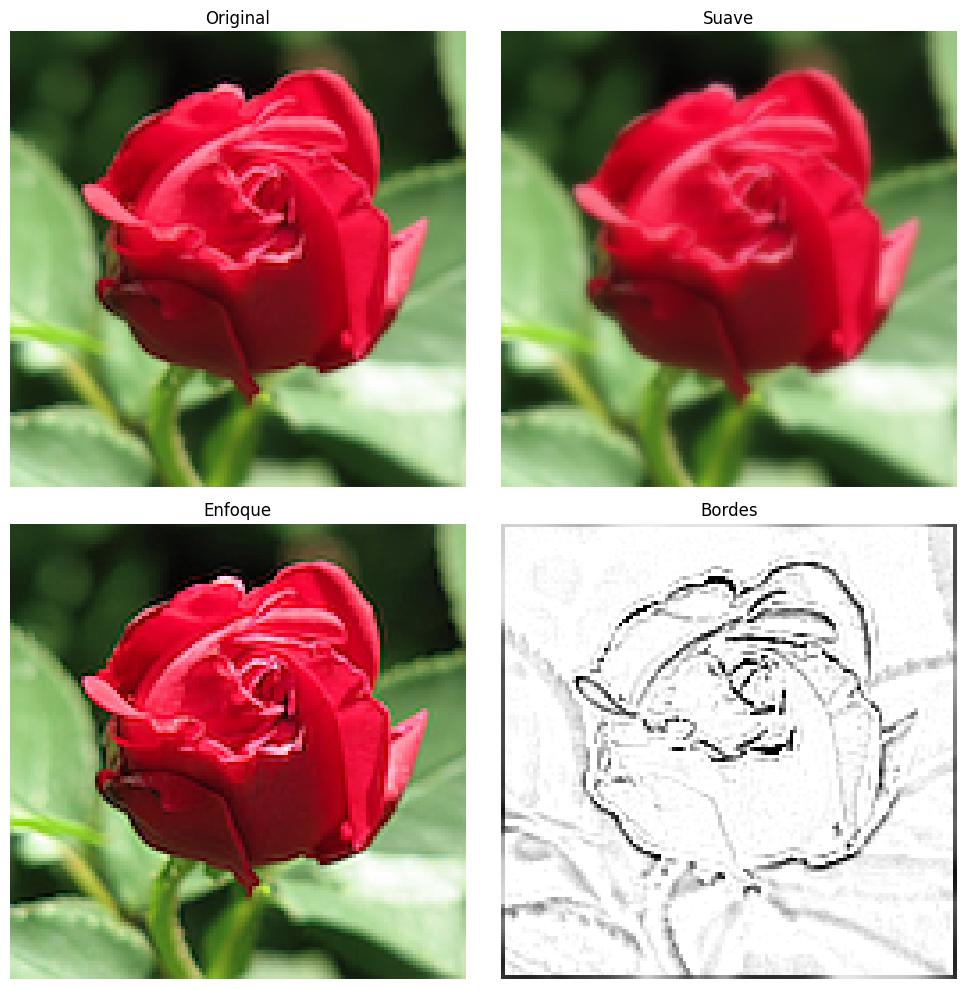

In [12]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8, 8))
axes = axes.flat

image_arr = flowers.loc[100, "image_layers"]
image_PIL = Image.fromarray(image_arr)
image_smooth = image_PIL.filter(ImageFilter.SMOOTH_MORE)
image_sharpen = image_PIL.filter(ImageFilter.SHARPEN)

image_PIL = image_PIL.convert('L')
image_edges = image_PIL.filter(ImageFilter.FIND_EDGES)

axes[0].imshow(image_arr)
axes[1].imshow(image_smooth.convert('RGB'))
axes[2].imshow(image_sharpen.convert('RGB'))
axes[3].imshow(image_edges, cmap='binary')


axes[0].set_title("Original")
axes[1].set_title("Suave")
axes[2].set_title("Enfoque")
axes[3].set_title("Bordes")

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

plt.tight_layout()
plt.show()

- Calcular imagen promedio global y el promedio entre las distintas especies. ¿Se pueden distinguir los promedios? ¿Cómo quedan los promedios si consideran las imágenes en blanco y negro?

In [13]:
flowers["red"] = flowers["image_layers"].apply(lambda x: x[:,:,0])
flowers["green"] = flowers["image_layers"].apply(lambda x: x[:,:,1])
flowers["blue"] = flowers["image_layers"].apply(lambda x: x[:,:,2])

In [14]:
image_mean_red = np.mean(np.stack(flowers.loc[:,"red"]), axis=0)
image_mean_green = np.mean(np.stack(flowers.loc[:,"green"]), axis=0)
image_mean_blue = np.mean(np.stack(flowers.loc[:,"blue"]), axis=0)

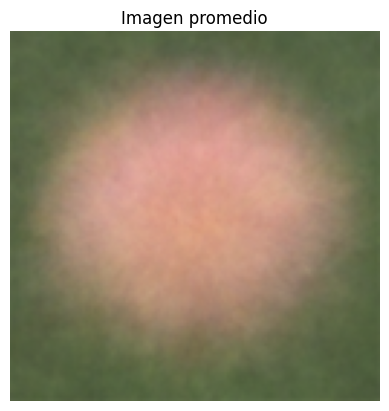

In [15]:
mean_image_all = np.stack([image_mean_red, image_mean_green, image_mean_blue], axis=2)
plt.imshow(mean_image_all/len(flowers), vmin=0, vmax=255)
plt.title("Imagen promedio")
plt.axis('off')
plt.show()

In [16]:
mean_per_label = {k:{} for k in flowers["label"].unique()}

for i in mean_per_label.keys():
    mean_per_label[i]["red"] = np.mean(flowers[flowers["label"] == i]["red"]/255, axis=0)
    mean_per_label[i]["green"] = np.mean(flowers[flowers["label"] == i]["green"]/255, axis=0)
    mean_per_label[i]["blue"] = np.mean(flowers[flowers["label"] == i]["blue"]/255, axis=0)

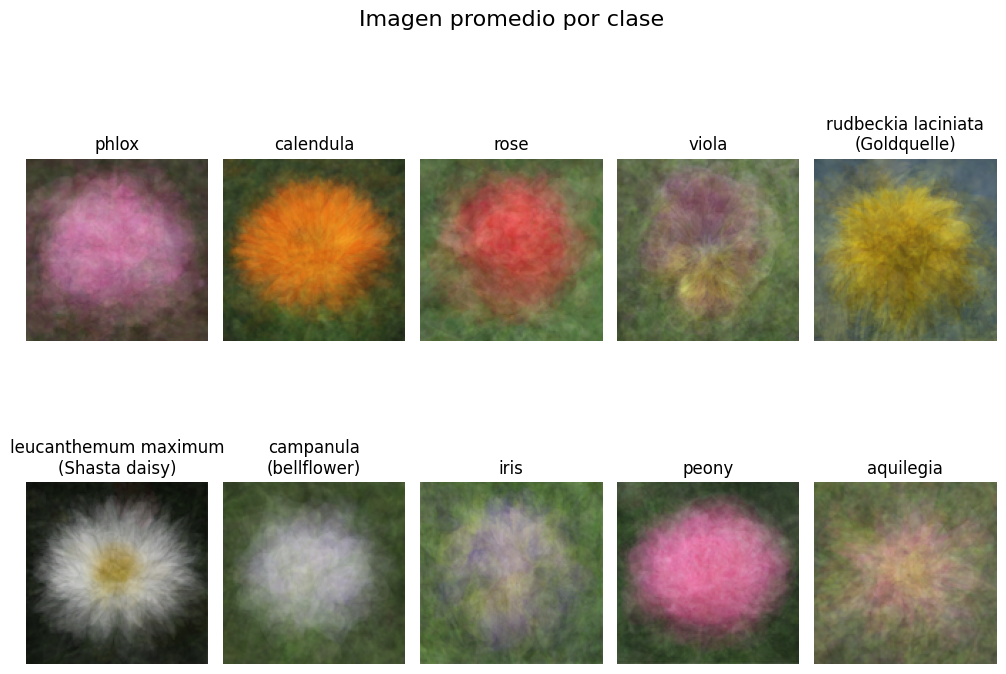

In [17]:
fig, axes = plt.subplots(2, len(mean_per_label)//2, sharey=True, sharex=True, figsize=(10, 8))
axes = axes.flat

for i, (k, v) in enumerate(mean_per_label.items()):
    mean_image = np.stack([v["red"], v["green"], v["blue"]], axis=2)
    axes[i].imshow(mean_image)
    axes[i].set_title(k)
    axes[i].axis('off')
fig.suptitle("Imagen promedio por clase", fontsize=16)
plt.tight_layout()
plt.show()

## Búsqueda de features

- Analizar las distribuciones de valores de pixels por cada especie. ¿Se puede distinguir una especie en algún rango de color?

In [18]:
flowers["red_flat"] = flowers["red"].apply(lambda x: x.flatten())
flowers["green_flat"] = flowers["green"].apply(lambda x: x.flatten())
flowers["blue_flat"] = flowers["blue"].apply(lambda x: x.flatten())

In [19]:
values_per_label = {k:{} for k in flowers["label"].unique()}

for i in values_per_label.keys():
    values_per_label[i]["red"] = np.stack(flowers[flowers["label"] == i]["red_flat"]).flatten()
    values_per_label[i]["green"] = np.stack(flowers[flowers["label"] == i]["green_flat"]).flatten()
    values_per_label[i]["blue"] = np.stack(flowers[flowers["label"] == i]["blue_flat"]).flatten()

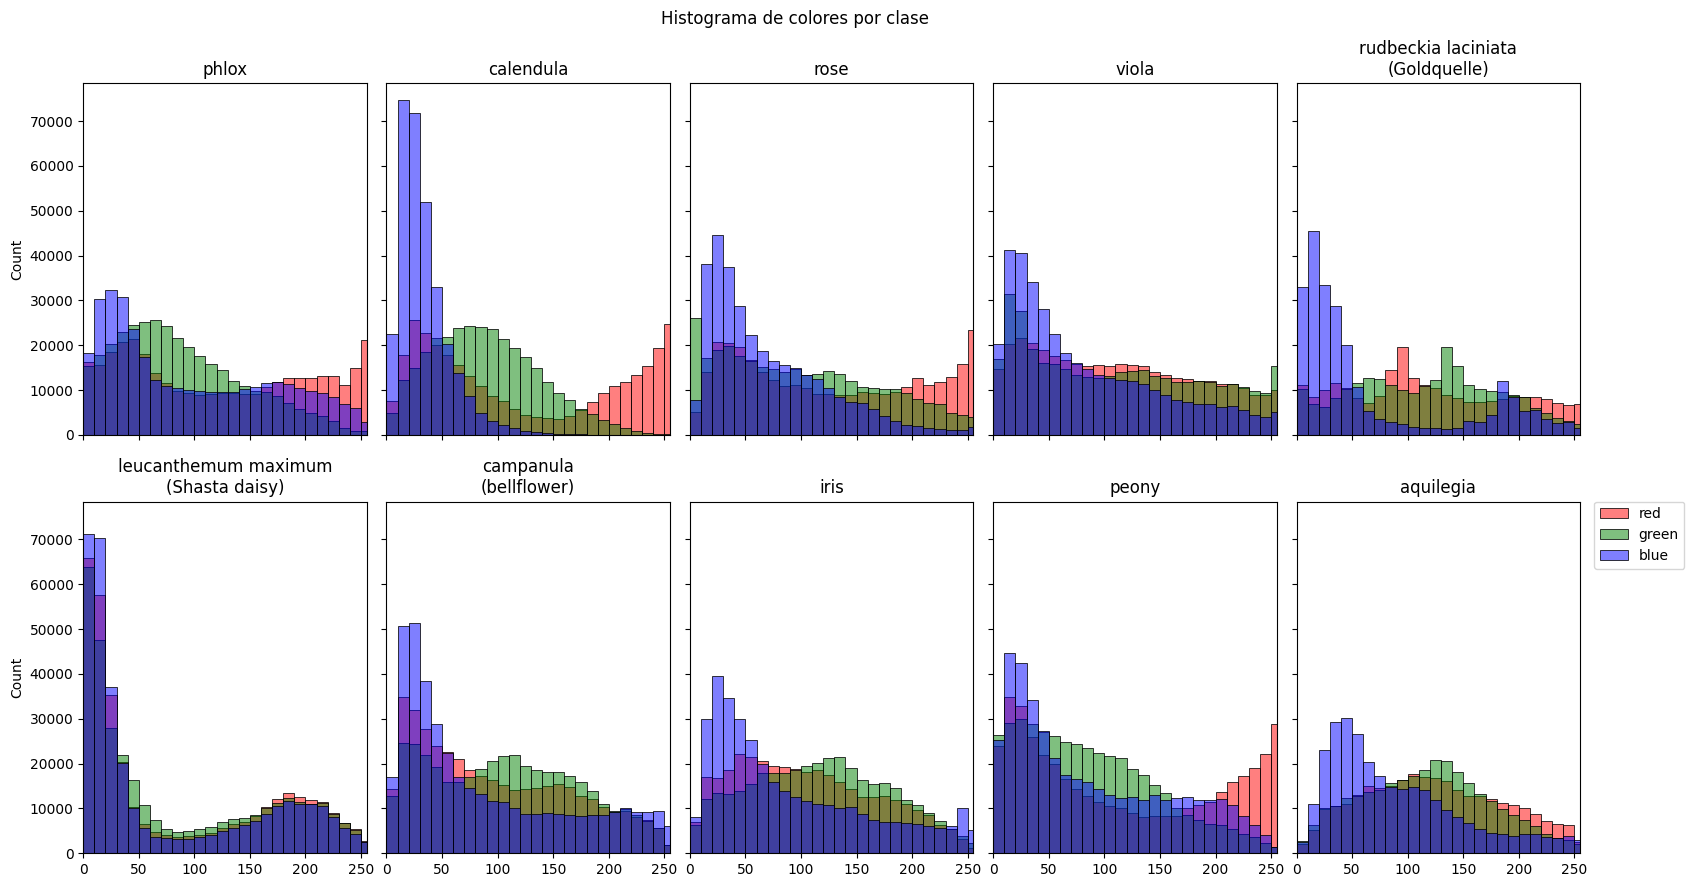

In [20]:
fig, axes = plt.subplots(2, len(mean_per_label)//2, sharey=True, sharex=True, figsize=(16, 9))
axes = axes.flat


for i, (k, v) in enumerate(values_per_label.items()):
    sns.histplot(values_per_label[k]["red"], color="red", alpha=0.5, label="red", ax=axes[i], bins=range(0, 255 + 10, 10))
    sns.histplot(values_per_label[k]["green"], color="green", alpha=0.5, label="green", ax=axes[i], bins=range(0, 255 + 10, 10))
    sns.histplot(values_per_label[k]["blue"], color="blue", alpha=0.5, label="blue", ax=axes[i], bins=range(0, 255 + 10, 10))
    axes[i].set_title(k)

fig.suptitle("Histograma de colores por clase")
plt.tight_layout()
plt.xlim(0, 255)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [21]:
for k, v in values_per_label.items():
    #calculate skew
    skew_red = skew(v["red"])
    skew_green = skew(v["green"])
    skew_blue = skew(v["blue"])
    #calculate kurtosis
    kurtosis_red = kurtosis(v["red"])
    kurtosis_green = kurtosis(v["green"])
    kurtosis_blue = kurtosis(v["blue"])

    print(f"Skew: Red {skew_red}, Green {skew_green}, Blue {skew_blue}")

Skew: Red 0.1306800615483133, Green 0.6182462280615763, Blue 0.4859151555749907
Skew: Red 0.2519243094701997, Green 0.4451503001247216, Blue 1.8728589854719644
Skew: Red 0.1528099170103773, Green 0.37812843255905304, Blue 1.1265232279745871
Skew: Red 0.26586060865287103, Green 0.2787863580840263, Blue 0.8655720295643069
Skew: Red 0.19394628107158168, Green 0.057777514480965214, Blue 1.1715829267236857
Skew: Red 0.6047469091541733, Green 0.5909016128885499, Blue 0.8000721730875435
Skew: Red 0.4600662369957862, Green 0.21936401675581396, Blue 0.8093084645919187
Skew: Red 0.34157083007467126, Green 0.10721935031751105, Blue 0.838605732110862
Skew: Red 0.25545916049674416, Green 0.6008042307662276, Blue 0.5881494039462769
Skew: Red 0.1674037913020705, Green 0.13933863857470127, Blue 0.95669577605311


- Realizar una inspección de las componentes principales del dataset y analizar si se
pueden identiﬁcar las especies en esta representación.

In [22]:
flowers["image_flat"] = flowers["image_layers"].apply(lambda x: x.reshape(128*128*3).flatten())

In [23]:
flowers_pca = flowers.copy()
flowers_pca["image_flat"] = flowers_pca["image_flat"].apply(lambda x: x/255 -0.5)
flowers_pca= flowers_pca["image_flat"].apply(pd.Series)
flowers_pca["label"] = flowers['label']

In [24]:
X, y = flowers_pca.drop(["label"], axis=1), flowers_pca["label"]

In [25]:
pca = PCA(0.95)

In [26]:
pca.fit(X)

PCA(n_components=0.95)

In [27]:
pca_res = pca.fit_transform(X)

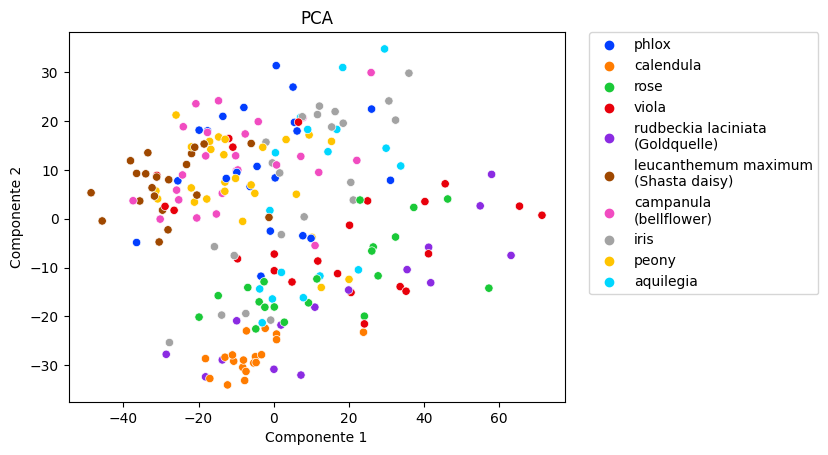

In [28]:
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=y, palette="bright")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("PCA")
plt.show()

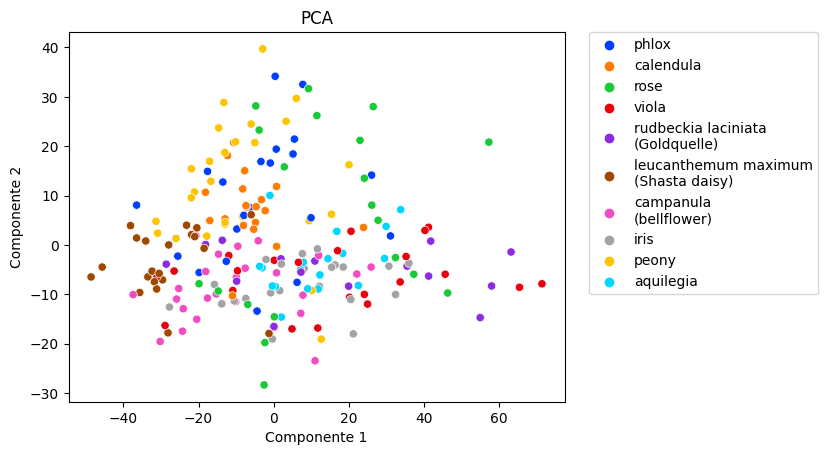

In [29]:
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,2], hue=y, palette="bright")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("PCA")
plt.show()

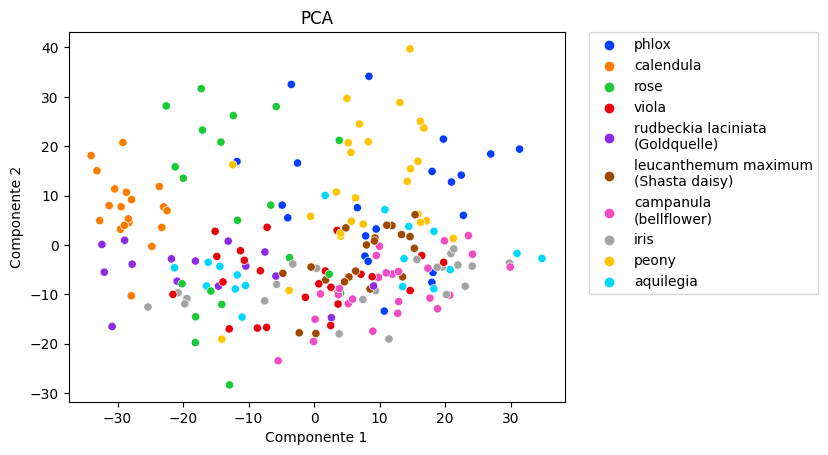

In [30]:
sns.scatterplot(x=pca_res[:,1], y=pca_res[:,2], hue=y, palette="bright")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("PCA")
plt.show()